In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
bankData = pd.read_csv("Bankdata.csv")

# Read the column description and ensure you understand each attribute well

In [28]:
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bankData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Study the data distribution in each attribute, share your findings

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


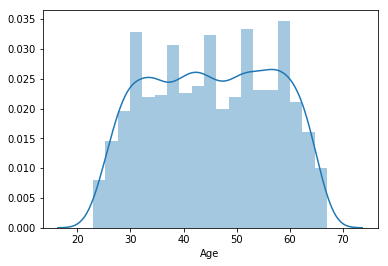

In [15]:
sns.distplot(bankData["Age"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


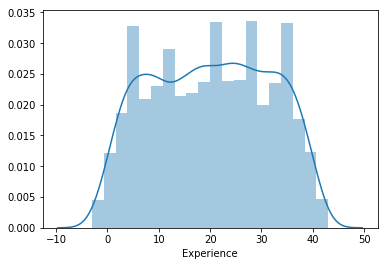

In [16]:
sns.distplot(bankData["Experience"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


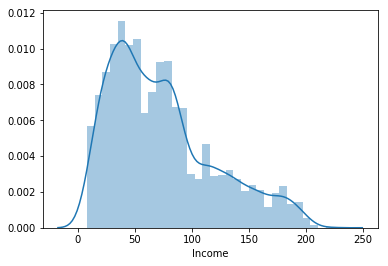

In [17]:
sns.distplot(bankData["Income"])

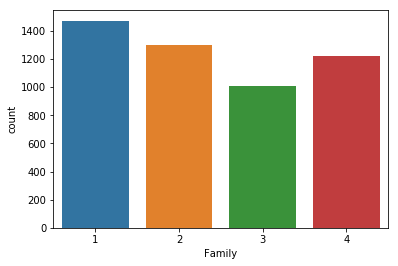

In [71]:
sns.countplot(x="Family", data=bankData)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


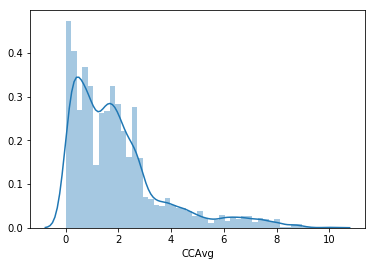

In [19]:
sns.distplot(bankData["CCAvg"])

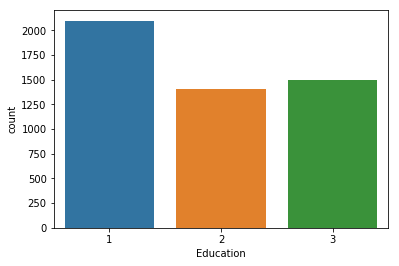

In [70]:
sns.countplot(x="Education", data=bankData)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


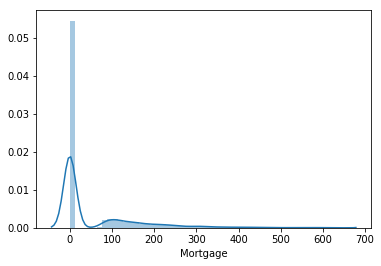

In [36]:
sns.distplot(bankData["Mortgage"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


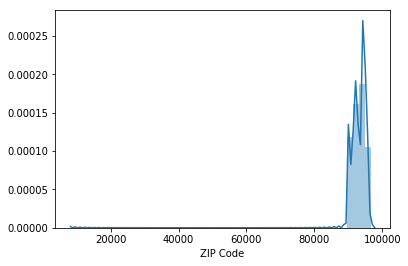

In [78]:
sns.distplot(bankData["ZIP Code"])

# Conclusion: Age, experience and zip code are muti-modal distributions, income and average credit card spent are multi-modal with right-skew (which means that very few customers are high income and have a high average credit card spent), mortgage is bi-modal with a heavy right-skew and long tail on the right-hand side (which means very few customers have taken high mortgages), number of customers with 1 or 4 family members are 25% each in the dataset, for education column about 40% of the customers are having an under-graduate degree

# Get the target column distribution. Your comments.

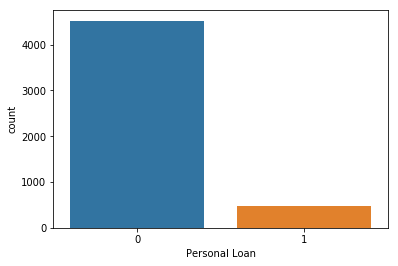

In [79]:
sns.countplot(x='Personal Loan', data=bankData)

# Conclusion: Around 10% of customers have taken personal loan

# Split the data into training and test set in the ratio of 70:30 respectively

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split

In [54]:
X=bankData.drop('ID', axis=1)
X=X.drop('Personal Loan', axis=1)
Y=bankData[["Personal Loan"]]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

In [58]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Logistic Reg Training Accuracy")
print(lr.score(X_train,Y_train))
print("Logistic Reg Testing Accuracy")
print(lr.score(X_test,Y_test))

Logistic Reg Training Accuracy
0.9122857142857143
Logistic Reg Testing Accuracy
0.902


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,Y_train)
print("kNN Training Accuracy")
print(knc.score(X_train,Y_train))
print("kNN Testing Accuracy")
print(knc.score(X_test,Y_test))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


kNN Training Accuracy
0.9394285714285714
kNN Testing Accuracy
0.89


In [60]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
print("Naive Bayes Training Accuracy")
print(gnb.score(X_train,Y_train))
print("Naive Bayes Testing Accuracy")
print(gnb.score(X_test,Y_test))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Training Accuracy
0.8882857142857142
Naive Bayes Testing Accuracy
0.8966666666666666


# Conclusion: The testing accuracy of Logistic, kNN and Naive Bayes is very close, but still Logistic is best among all the 3, with highest testing accuracy of 90.2, i.e. this model will predict 90% of the time the likelihood of a liability customer buying personal loans

# Print the confusion matrix for all the above models

In [66]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression model

In [67]:
Y_pred_log = lr.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_log))

[[1303   40]
 [ 107   50]]


# Confusion matrix for kNN model

In [68]:
Y_pred_knc = knc.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_knc))

[[1288   55]
 [ 110   47]]


# Confusion matrix for Naive Bayes model

In [69]:
Y_pred_gnb = gnb.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_gnb))

[[1251   92]
 [  63   94]]


# Give your reasoning on which is the best model in this case and why it performs better

# Conclusion: For Thera Bank; false positive is an error when the customer has not taken the loan, but the model predicts that the customer will take the loan; false negative is an error when the customer has taken the loan, but the model predicts the customer will not take the loan. So false negative is a costly error as based on the model, the marketing team will not reach out to the customer and it will turn out to be a missed opportunity, i.e. false negative errors have to be minimised. In all the above three models, as seen earlier, the testing accuracy is very close, but since the false negatives are least (63) in Naive Bayes model, it is the best model to predict the likelihood of a liability customer buying personal loans.